In [1]:
%load_ext autoreload

%autoreload 2

Combining the retrieved match/odds data into one dataframe.

In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

import os
import pandas as pd
import numpy as np

In [5]:
import Odds_Scrape_Methods

In [3]:
gecko_path = r'/home/conor/Documents/geckodriver.exe'
gecko_path = r"B:\Git_Projects\dota_project\geckodriver.exe"

gecko_path = os.path.join(os.getcwd(), "geckodriver.exe")

# Odds portal stuff

In [6]:
odds_portal_site = "https://www.oddsportal.com/esports/world/dota-2-the-international/results/#/"

odds_df = Odds_Scrape_Methods.get_oddsportal_data(odds_portal_driver, odds_portal_site)

NameError: name 'odds_portal_driver' is not defined

In [6]:
odds_portal_sites = ["https://www.oddsportal.com/esports/world/dota-2-the-international/results/",
                     "https://www.oddsportal.com/esports/world/dota-2-the-international/results/#/page/2/",
                     "https://www.oddsportal.com/esports/world/dota-2-the-international-2017/results/",
                     "https://www.oddsportal.com/esports/world/dota-2-the-international-2017/results/#/page/2/",
                     "https://www.oddsportal.com/esports/world/dota-2-the-international-2016/results/",
                     "https://www.oddsportal.com/esports/world/dota-2-the-international-2016/results/#/page/2/",
                     "https://www.oddsportal.com/esports/world/dota-2-the-international-2015/results/",
                     "https://www.oddsportal.com/esports/world/dota-2-the-international-2015/results/#/page/2/"]

In [11]:
oddsportal_urls = pd.read_csv(r"B:\Git_Projects\dota_project\oddsportal_matches.csv", names = ["URL", "Name"])

In [33]:
odds_portal = []

#for i in range(len(odds_portal_sites)):

for i, tournament in oddsportal_urls.iterrows():

    odds_portal_driver = webdriver.Firefox(executable_path = gecko_path)
    print(i)
    
    # Add main stage results
    
    try:
        odds_df = Odds_Scrape_Methods.get_oddsportal_data(odds_portal_driver, tournament[0])
        odds_portal.append(odds_df)
        
    except ValueError: pass
    
    odds_portal_driver.close()
    
final_odds = pd.concat(odds_portal).reset_index()
final_odds["Day"] = final_odds.apply(lambda row: row["date"].day, axis = 1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [34]:
final_odds.apply(lambda row: row["date"].year, axis = 1).value_counts()

2018    330
2016    217
2017    124
2019    110
2015     88
dtype: int64

In [35]:
from sklearn.metrics import roc_auc_score, roc_curve

print(roc_auc_score(final_odds["T1_win"], final_odds["Prob_1"]))

0.7201687808502734


In [38]:
final_odds.shape

(869, 11)

In [36]:
import matplotlib.pyplot as plt

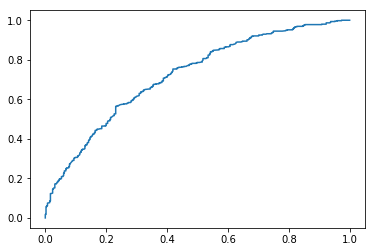

In [37]:
sens, spec, thresh = roc_curve(final_odds["T1_win"], final_odds["Prob_1"])

plt.plot(sens, spec)

# Dotabuff 

In [5]:
dota_buff_driver = webdriver.Firefox(executable_path = gecko_path)

In [7]:
dota_buff = "https://www.dotabuff.com/esports/leagues/9870-the-international-2018/scores"

dota_buff_df = Odds_Scrape_Methods.get_dotabuff_matches(dota_buff_driver, dota_buff)

# Liquid Dota

In [40]:
liquid_urls = pd.read_csv(r"B:\Git_Projects\dota_project\liquipedia_matches.csv", names = ["URL", "Name"])

In [50]:
liquid_data = []

for i, tournament in liquid_urls.iterrows():
    
    liquid_driver = webdriver.Firefox(executable_path = gecko_path)
    print(i)
    
    print(tournament[0])

    #try:
    # Add group stage results
    liquid_df = Odds_Scrape_Methods.liquid_dota_group(liquid_driver, tournament[0])
    liquid_data.append(liquid_df)
        
    #except: pass
    
    try:
        # Add main stage results
        liquid_df = Odds_Scrape_Methods.liquid_dota(liquid_driver, tournament[0])
        liquid_data.append(liquid_df)
        
    except: pass
    
    liquid_driver.close()
    
liquid = pd.concat(liquid_data).reset_index()

0
https://liquipedia.net/dota2/Frankfurt_Major/2015
1
https://liquipedia.net/dota2/Shanghai_Major/2016
2
https://liquipedia.net/dota2/Manila_Major/2016
3
https://liquipedia.net/dota2/The_International/2016
4
https://liquipedia.net/dota2/Boston_Major/2016
5
https://liquipedia.net/dota2/Kiev_Major/2017
6
https://liquipedia.net/dota2/The_International/2017
7
https://liquipedia.net/dota2/ESL_One/Hamburg/2017
8
https://liquipedia.net/dota2/DreamLeague/Season_8
9
https://liquipedia.net/dota2/ESL_One/Katowice/2018
10
https://liquipedia.net/dota2/PGL/Bucharest_Major/2018
11
https://liquipedia.net/dota2/Dota_2_Asia_Championships/2018
12
https://liquipedia.net/dota2/EPICENTER/2018
13
https://liquipedia.net/dota2/Mars_Dota_2_League/Changsha_Major/2018
14
https://liquipedia.net/dota2/ESL_One/Birmingham/2018
15
https://liquipedia.net/dota2/Supermajor/2018
16
https://liquipedia.net/dota2/PGL/Kuala_Lumpur_Major
17
https://liquipedia.net/dota2/Chongqing_Major/2019
18
https://liquipedia.net/dota2/Dream

In [47]:
liquid

,index,Rounds,date,dire,radiant
0,0,"[{'Radiant_win': False, 'radiant_hero_names': ...",2016-06-07 03:00:00,MVP Phoenix,Team Liquid
1,1,"[{'Radiant_win': False, 'radiant_hero_names': ...",2016-06-07 07:00:00,OG,Natus Vincere
2,2,"[{'Radiant_win': True, 'radiant_hero_names': [...",2016-06-08 03:00:00,Digital Chaos,Newbee
3,3,"[{'Radiant_win': True, 'radiant_hero_names': [...",2016-06-08 06:20:00,Fnatic,LGD Gaming
4,4,"[{'Radiant_win': False, 'radiant_hero_names': ...",2016-06-09 09:40:00,OG,MVP Phoenix
5,5,"[{'Radiant_win': True, 'radiant_hero_names': [...",2016-06-09 13:00:00,Fnatic,Newbee
6,6,"[{'Radiant_win': False, 'radiant_hero_names': ...",2016-06-11 06:20:00,Newbee,OG
7,7,"[{'Radiant_win': False, 'radiant_hero_names': ...",2016-06-07 09:40:00,compLexity Gaming,Wings Gaming
8,8,"[{'Radiant_win': True, 'radiant_hero_names': [...",2016-06-07 11:00:00,Mineski.Sports5,Alliance
9,9,"[{'Radiant_win': False, 'radiant_hero_names': ...",2016-06-07 12:20:00,Vici Gaming Reborn,Evil Geniuses


liquid_driver = webdriver.Firefox(executable_path = gecko_path)
group_site = r"https://liquipedia.net/dota2/The_International/201{}/Group_Stage".format(7)

# Add group stage results
liquid_df = Odds_Scrape_Methods.liquid_dota_group(liquid_driver, group_site)
liquid_data.append(liquid_df)

# Merging dataframes

In [51]:
final_odds.shape, liquid.shape

((869, 11), (473, 5))

In [52]:
final_odds["Day"] = final_odds.apply(lambda row: row["date"].day, axis = 1)

In [53]:
liquid["Day"] = liquid.apply(lambda row: row["date"].day, axis = 1)

In [54]:
merged = pd.merge(final_odds, liquid, how='inner'
         , left_on=["Team_1","Team_2","Day"],right_on=["radiant","dire","Day"] )

In [55]:
merged.shape

(301, 16)

In [56]:
merged.drop(["index_x","date_x","index_y","date_y"], axis = 1).to_pickle(r"B:/Git_Projects/dota_project/merged_data")

In [57]:
merged.sample(10)

,index_x,Score,Team_1,Team_2,team_1_odds,team_2_odds,date_x,Prob_1,Prob_2,T1_win,Day,index_y,Rounds,date_y,dire,radiant
207,27,2:0,PSG.LGD,Fnatic,33/100,11/5,2018-11-10 05:00:00,0.706402,0.293598,1,10,12,"[{'Radiant_win': True, 'radiant_hero_names': [...",2018-11-10 05:00:00,Fnatic,PSG.LGD
214,1,2:0,Evil Geniuses,PSG.LGD,32/25,73/100,2019-01-26 10:05:00,0.431421,0.568579,1,26,19,"[{'Radiant_win': True, 'radiant_hero_names': [...",2019-01-26 10:00:00,PSG.LGD,Evil Geniuses
225,19,1:2,Fnatic,EHOME,49/50,79/100,2019-01-21 05:30:00,0.474801,0.525199,0,21,2,"[{'Radiant_win': False, 'radiant_hero_names': ...",2019-01-21 04:30:00,EHOME,Fnatic
108,18,2:1,OG,Ad Finem,23/50,173/100,2016-12-04 18:00:00,0.651551,0.348449,1,4,17,"[{'Radiant_win': True, 'radiant_hero_names': [...",2016-12-04 18:00:00,Ad Finem,OG
193,9,2:1,TNC Predator,Vici Gaming,53/25,7/20,2018-11-14 02:00:00,0.302013,0.697987,1,14,15,"[{'Radiant_win': False, 'radiant_hero_names': ...",2018-11-14 02:00:00,Vici Gaming,TNC Predator
144,37,2:0,Virtus.pro,Team Liquid,111/100,7/10,2019-05-04 12:30:00,0.446194,0.553806,1,4,2,"[{'Radiant_win': True, 'radiant_hero_names': [...",2019-05-04 13:30:00,Team Liquid,Virtus.pro
231,24,2:0,The Pango,J.Storm,31/50,5/4,2019-01-20 06:00:00,0.581395,0.418605,1,20,13,"[{'Radiant_win': True, 'radiant_hero_names': [...",2019-01-20 06:00:00,J.Storm,The Pango
110,22,0:2,Team Faceless,LGD Gaming,103/100,19/25,2016-12-04 15:00:00,0.464380,0.535620,0,4,11,"[{'Radiant_win': False, 'radiant_hero_names': ...",2016-12-04 15:00:00,LGD Gaming,Team Faceless
37,21,1:2,OG,MVP Phoenix,23/100,153/50,2016-08-08 18:30:00,0.767486,0.232514,0,8,5,"[{'Radiant_win': False, 'radiant_hero_names': ...",2016-08-08 19:00:00,MVP Phoenix,OG
107,14,2:0,Virtus.pro,iG Vitality,9/100,609/100,2016-12-07 15:00:00,0.866748,0.133252,1,7,0,"[{'Radiant_win': True, 'radiant_hero_names': [...",2016-12-07 15:00:00,iG Vitality,Virtus.pro


In [58]:
pd.merge(final_odds, final, how='inner', left_index=True, right_index=True)#.shape

NameError: name 'final' is not defined